DataSet 1 - Breast Cancer

This dataset of breast cancer patients was obtained from the 2017 November update of the SEER Program of the NCI, which provides information on population-based cancer statistics. The dataset involved female patients with infiltrating duct and lobular carcinoma breast cancer (SEER primary cites recode NOS histology codes 8522/3) diagnosed in 2006-2010. Patients with unknown tumour size, examined regional LNs, positive regional LNs, and patients whose survival months were less than 1 month were excluded; thus, 4024 patients were ultimately included.

Predict - Survivability

Kaggle Link - https://www.kaggle.com/datasets/reihanenamdari/breast-cancer


This Collab is about fully exploiting Decision Trees and Derivatives of it. Think of each of the dataset independently and try to find optimal solutions by following this path:

Define and understand the dataset - univariate, bivariate, collinearity analysis
Perform feature engineering - scaling, normalization, encoding
Develop a baseline model - Linear and Logistic Regression
For baseline model do regularization to avoid overfitting
Calculate accuracy metrics R2 for Regression, Confusion Matrix for Classification
After developing baseline models - go for 3 tiers of models

Level 1 - Decision Tree
Level 2 - Bagging Random Forests
Level 3 - Boosting XGBoost and / or Adaboost and / or Catboost
Perform hyperparameter tuning for all 3 level to find optimum balance between BIAS and Variance

Can use GridsearchCV
Growth inhibition parameters + Pruning (if required)
Lastly Test which algorithm is best and why for each type of dataset.

# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset Ingestion

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Classroom/Data Science Course /datasets/Copy of Breast_Cancer.csv')

In [ ]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


# ***Univariate Analysis ***

In [ ]:
#Number of column & Row
df.shape

(4024, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [ ]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


<Figure size 1000x1000 with 0 Axes>

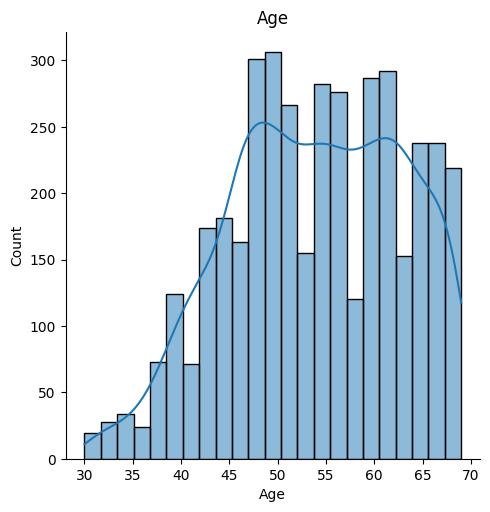

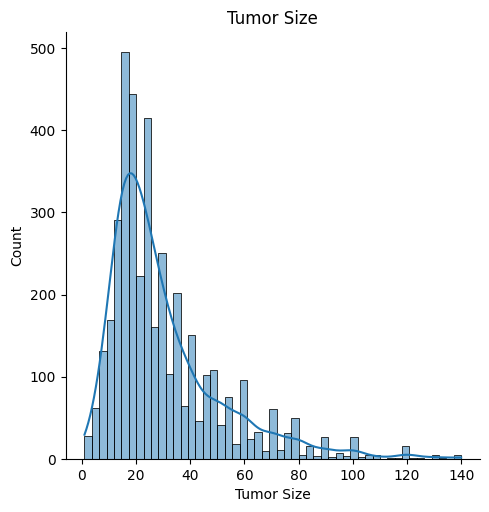

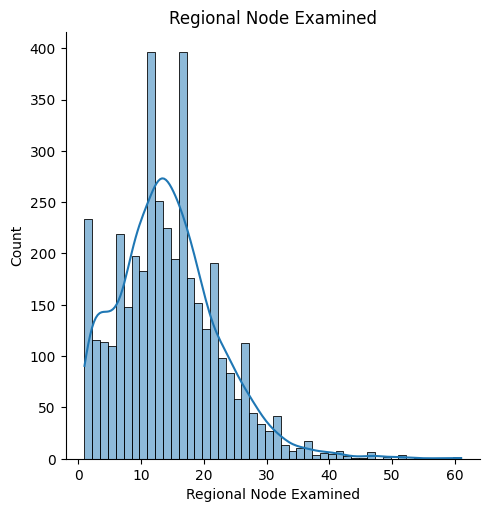

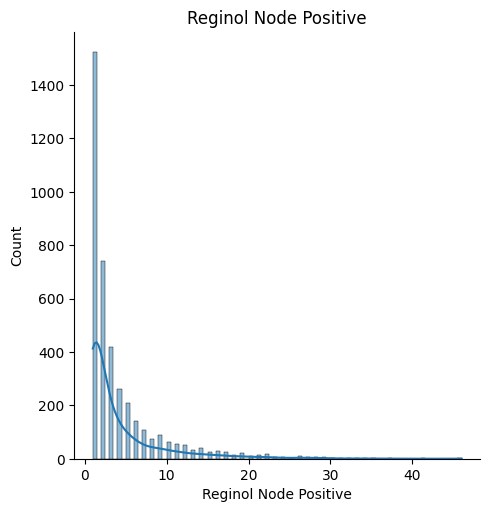

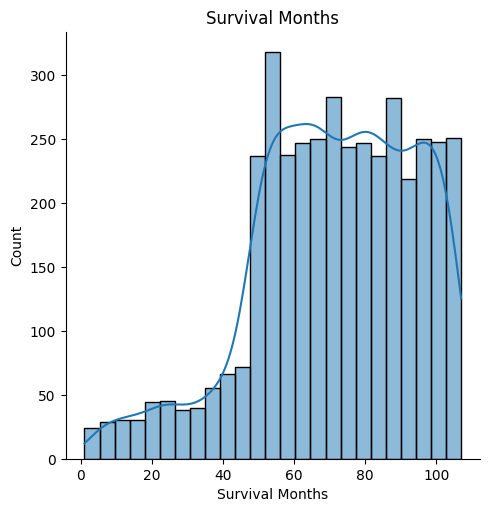

In [ ]:
plt.figure(figsize=(10,10))
for col in df.select_dtypes('int'):
    sns.displot(df[col],kde=True)
    plt.title(col)

plt.show()

In [ ]:
# number of column in the dataset
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [ ]:
# type of data whether it is numerical or categorical
df.dtypes


,0
Age,int64
Race,object
Marital Status,object
T Stage,object
N Stage,object
6th Stage,object
differentiate,object
Grade,object
A Stage,object
Tumor Size,int64


In [ ]:
#define numerical data
numerical_data = df.select_dtypes(include=['number'])
print(numerical_data)

      Age  Tumor Size  Regional Node Examined  Reginol Node Positive  \
0      68           4                      24                      1   
1      50          35                      14                      5   
2      58          63                      14                      7   
3      58          18                       2                      1   
4      47          41                       3                      1   
...   ...         ...                     ...                    ...   
4019   62           9                       1                      1   
4020   56          46                      14                      8   
4021   68          22                      11                      3   
4022   58          44                      11                      1   
4023   46          30                       7                      2   

      Survival Months  
0                  60  
1                  62  
2                  75  
3                  84  
4              

In [ ]:
#categorical data
categorical_data = df.select_dtypes(include=['object'])
print(categorical_data)

       Race Marital Status T Stage  N Stage 6th Stage  \
0     White        Married       T1      N1       IIA   
1     White        Married       T2      N2      IIIA   
2     White       Divorced       T3      N3      IIIC   
3     White        Married       T1      N1       IIA   
4     White        Married       T2      N1       IIB   
...     ...            ...      ...     ...       ...   
4019  Other        Married       T1      N1       IIA   
4020  White       Divorced       T2      N2      IIIA   
4021  White        Married       T2      N1       IIB   
4022  Black       Divorced       T2      N1       IIB   
4023  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage Estrogen Status  \
0         Poorly differentiated     3  Regional        Positive   
1     Moderately differentiated     2  Regional        Positive   
2     Moderately differentiated     2  Regional        Positive   
3         Poorly differentiated     3  Regional

In [ ]:
status_counts=df["Status"].value_counts()
status_counts

,count
Status,
Alive,3408
Dead,616


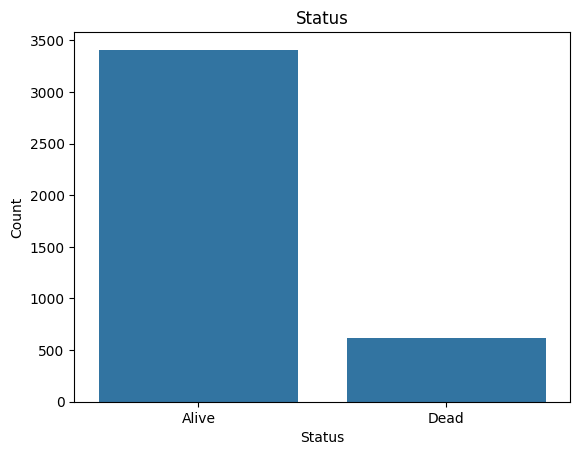

In [ ]:
# Create a seaborn bar plot
sns.barplot(x=status_counts.index, y=status_counts.values)

# Set the labels and title
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Status')

# Show the plot
plt.show()


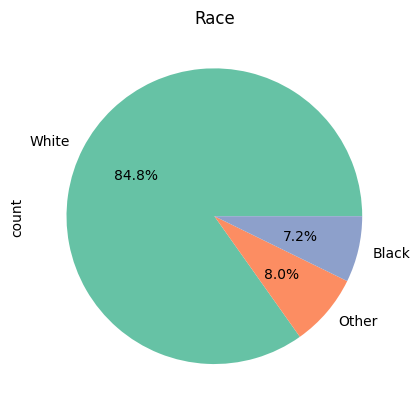

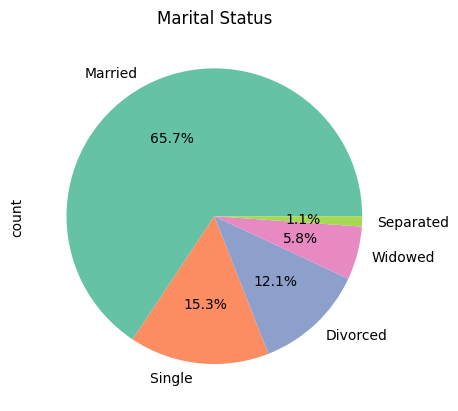

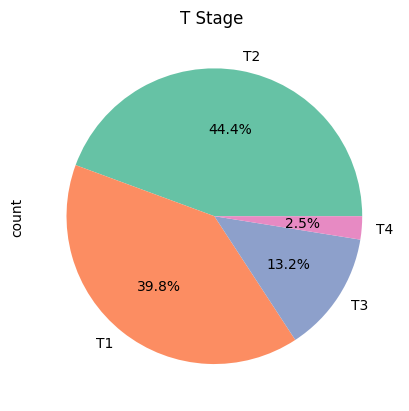

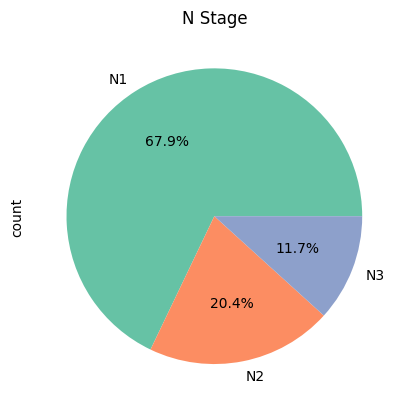

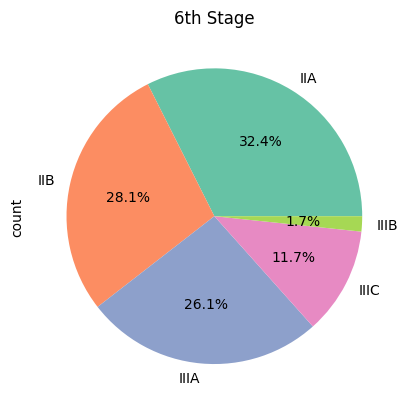

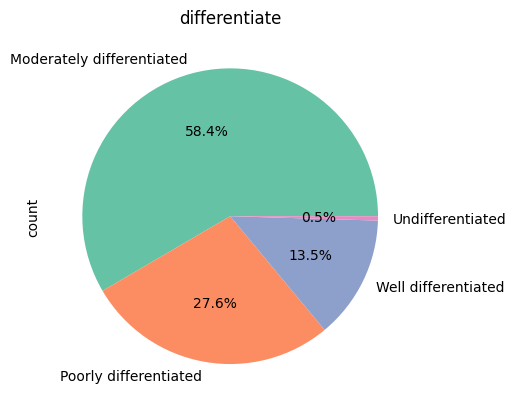

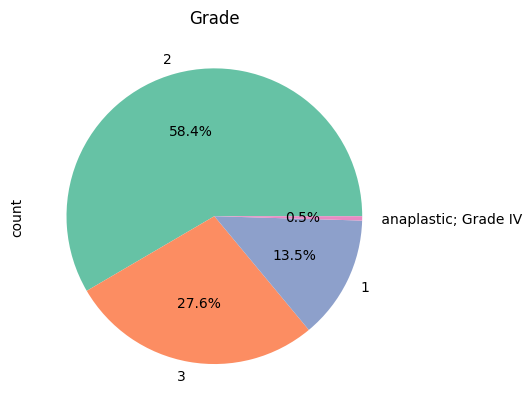

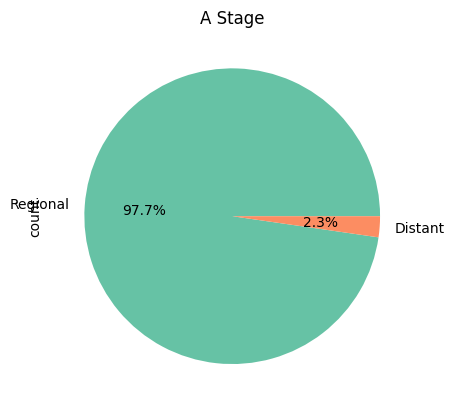

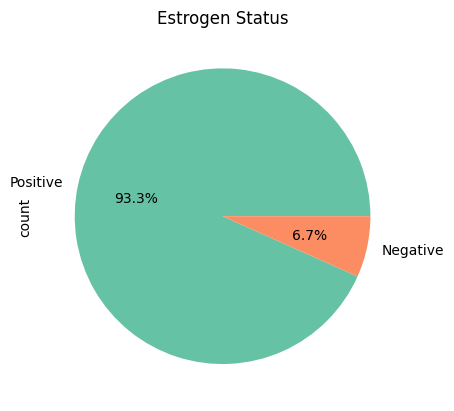

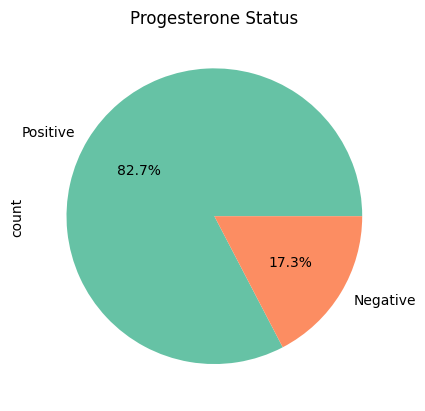

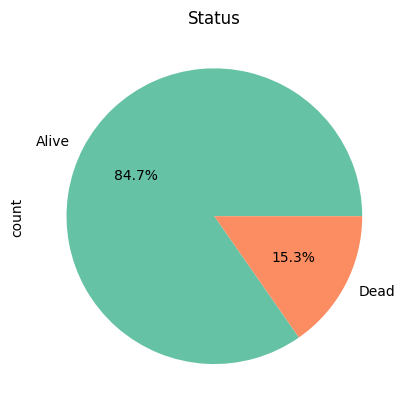

In [ ]:
for index ,col in enumerate(df.select_dtypes('object')):

    df[col].value_counts(ascending=False).plot(kind='pie',autopct='%1.1f%%', colors=sns.color_palette("Set2", len(df[col].value_counts())).as_hex())
    plt.title(col)
    plt.show()

# Bivariate analysis

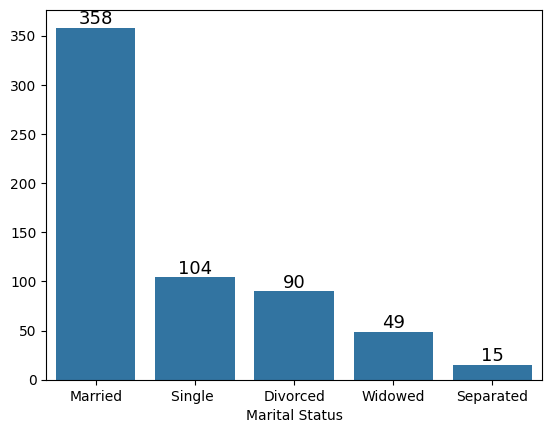

In [ ]:
deads=df[df['Status']=='Dead']['Marital Status'].value_counts(ascending=False)
ax=sns.barplot(x=deads.index, y=deads.values)
ax.bar_label(ax.containers[0], fontsize=13)
plt.show()

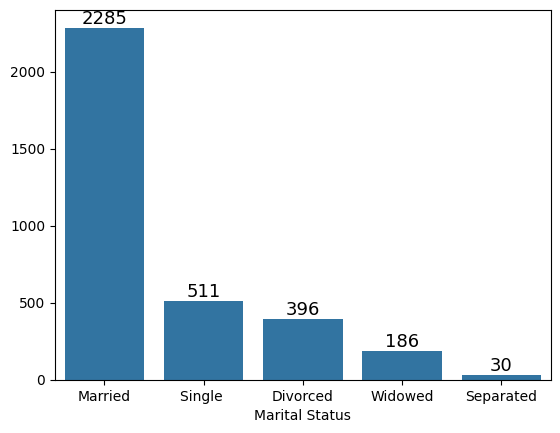

In [ ]:
alive = df[df['Status']=='Alive']['Marital Status'].value_counts(ascending=False)
ax=sns.barplot(x=alive.index,y=alive.values)
ax.bar_label(ax.containers[0],fontsize = 13)
plt.show()


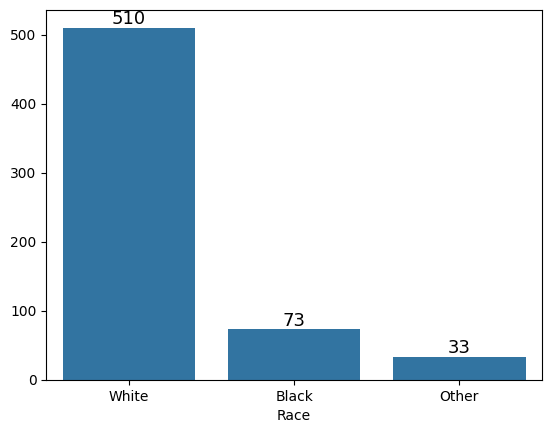

In [ ]:
deads=df[df['Status']=='Dead']['Race'].value_counts(ascending=False)
ax=sns.barplot(x=deads.index, y=deads.values)
ax.bar_label(ax.containers[0], fontsize=13)
plt.show()

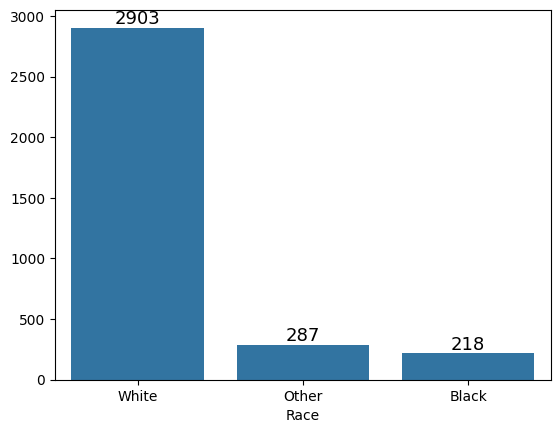

In [ ]:
alive = df[df['Status']=='Alive']['Race'].value_counts(ascending=False)
ax=sns.barplot(x=alive.index,y=alive.values)
ax.bar_label(ax.containers[0],fontsize = 13)
plt.show()

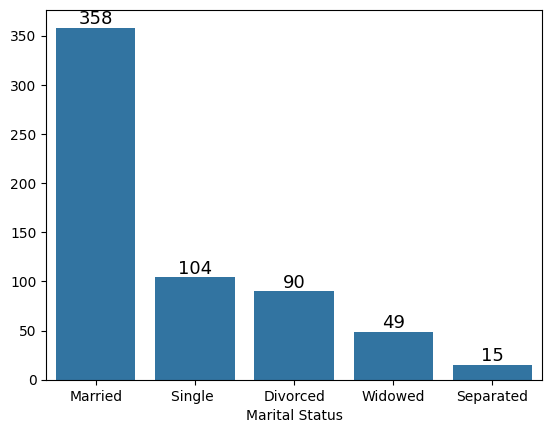

In [ ]:
deads=df[df['Status']=='Dead']['Marital Status'].value_counts(ascending=False)
ax=sns.barplot(x=deads.index, y=deads.values)
ax.bar_label(ax.containers[0], fontsize=13)
plt.show()

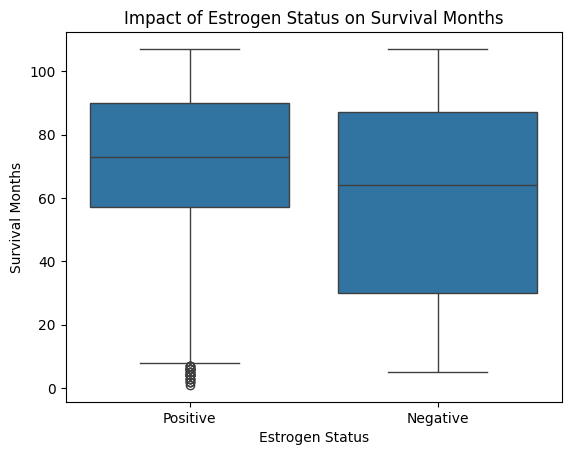

In [ ]:
# Create the box plot which define number of survival month
sns.boxplot(x='Estrogen Status', y='Survival Months', data=df)

# Add title to the plot
plt.title('Impact of Estrogen Status on Survival Months')

# Show the plot
plt.show()

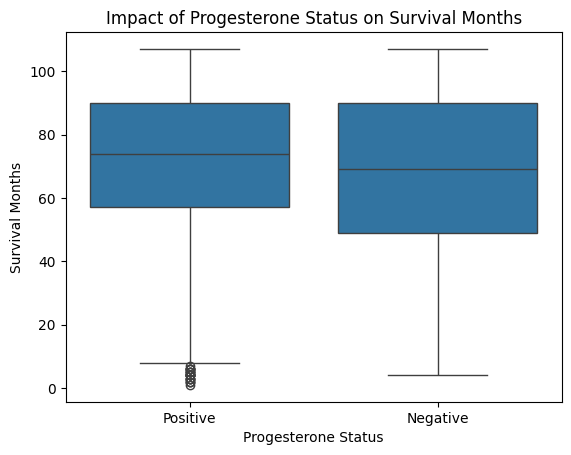

In [ ]:
# Create the box plot which define number of survival month
sns.boxplot(x='Progesterone Status', y='Survival Months', data=df)

# Add title to the plot
plt.title('Impact of Progesterone Status on Survival Months')

# Show the plot
plt.show()

## Collinearity Analysis

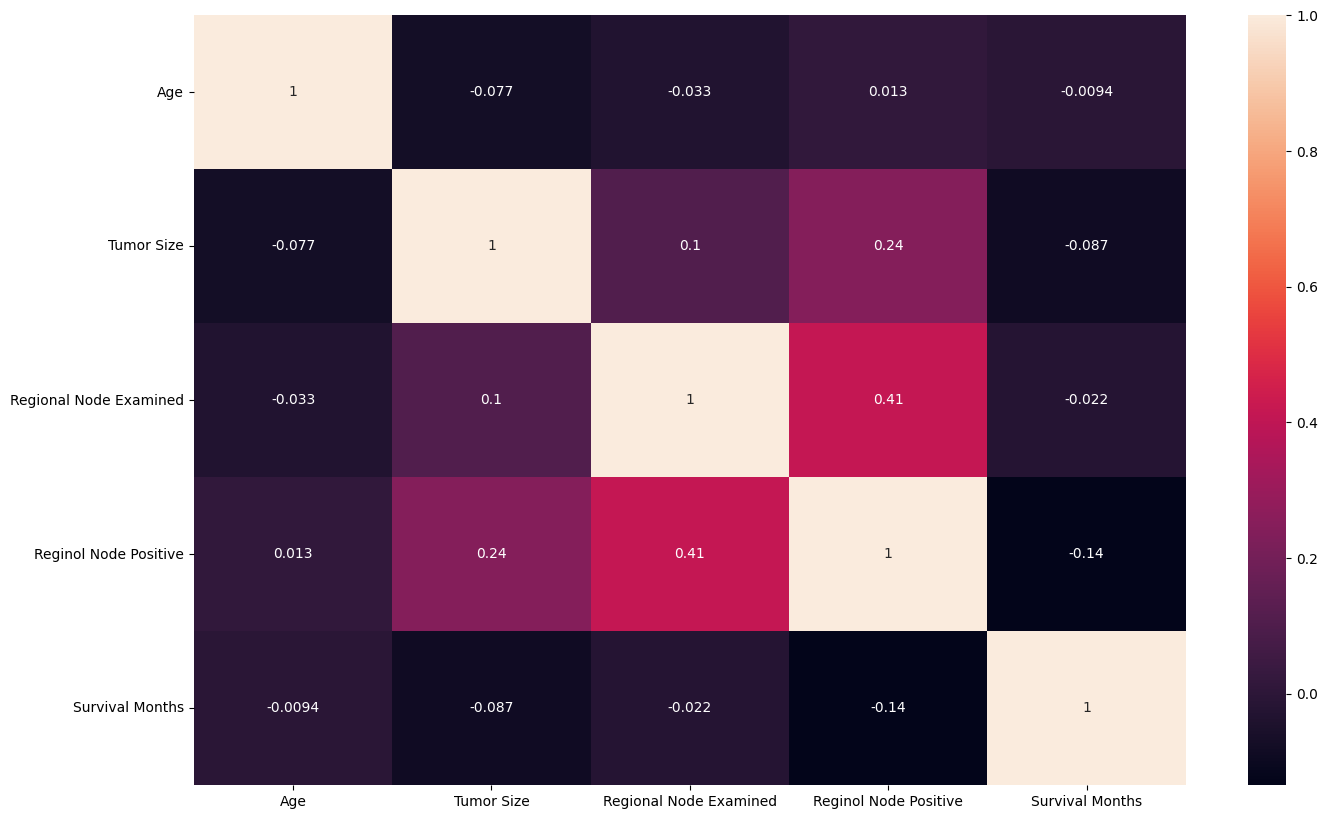

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(numeric_only=True) , annot =True )
plt.show()

# Exploratory Data Analysis

In [ ]:
#check for missing values (NaNs) in each column
df.isna().sum()

,0
Age,0
Race,0
Marital Status,0
T Stage,0
N Stage,0
6th Stage,0
differentiate,0
Grade,0
A Stage,0
Tumor Size,0


In [ ]:
#count the number of duplicate rows
df.duplicated().sum()


1

In [ ]:
# drop the duplicates rows
df.drop_duplicates(inplace = True)

In [ ]:
encoder = LabelEncoder()

# Loop through all categorical columns and encode them
for col in df.select_dtypes('object').columns:
    df[col] = encoder.fit_transform(df[col])

df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0


In [ ]:
scaler=MinMaxScaler()
for col in df.columns :
        df[col]=scaler.fit_transform(df[[col]])

In [ ]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,0.974359,1.0,0.25,0.000000,0.0,0.00,0.333333,1.000000,1.0,0.021583,1.0,1.0,0.383333,0.000000,0.556604,0.0
1,0.512821,1.0,0.25,0.333333,0.5,0.50,0.000000,0.666667,1.0,0.244604,1.0,1.0,0.216667,0.088889,0.575472,0.0
2,0.717949,1.0,0.00,0.666667,1.0,1.00,0.000000,0.666667,1.0,0.446043,1.0,1.0,0.216667,0.133333,0.698113,0.0
3,0.717949,1.0,0.25,0.000000,0.0,0.00,0.333333,1.000000,1.0,0.122302,1.0,1.0,0.016667,0.000000,0.783019,0.0
4,0.435897,1.0,0.25,0.333333,0.0,0.25,0.333333,1.000000,1.0,0.287770,1.0,1.0,0.033333,0.000000,0.462264,0.0


**Spilting Data**

In [ ]:
#Splitting Data
x = df.drop(columns="Status",axis=1)
y = df.loc[:,"Status"]
x.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,0.974359,1.0,0.25,0.000000,0.0,0.00,0.333333,1.000000,1.0,0.021583,1.0,1.0,0.383333,0.000000,0.556604
1,0.512821,1.0,0.25,0.333333,0.5,0.50,0.000000,0.666667,1.0,0.244604,1.0,1.0,0.216667,0.088889,0.575472
2,0.717949,1.0,0.00,0.666667,1.0,1.00,0.000000,0.666667,1.0,0.446043,1.0,1.0,0.216667,0.133333,0.698113
3,0.717949,1.0,0.25,0.000000,0.0,0.00,0.333333,1.000000,1.0,0.122302,1.0,1.0,0.016667,0.000000,0.783019
4,0.435897,1.0,0.25,0.333333,0.0,0.25,0.333333,1.000000,1.0,0.287770,1.0,1.0,0.033333,0.000000,0.462264


# **Training the Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
#Handing the Imbalance data in target variable
from imblearn.over_sampling import RandomOverSampler
rs = RandomOverSampler()
x_rs,y_rs=rs.fit_resample(x,y)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_rs,y_rs,test_size=0.2,random_state=42)


In [ ]:
Model1 = LogisticRegression()
Model2 = RandomForestClassifier(n_estimators=10)
Model3 = GradientBoostingClassifier(n_estimators=100)
Model4 = SVC()
Model5 = XGBClassifier()
Model6 = KNeighborsClassifier()
Model7 = GaussianNB()
Model8 = DecisionTreeClassifier(criterion = 'entropy')
Model9 = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME')

In [ ]:
# Initialize an empty list to store accuracy scores
acc_list = []

# Define the function to fit the model and display results
def model_result(model):
    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Predict on the test data
    preds = model.predict(x_test)

    # Calculate accuracy and append to acc_list
    acc = accuracy_score(y_test, preds)
    acc_list.append(acc)

    # Print classification report
    print(classification_report(y_test, preds))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, preds)

    # Plot confusion matrix heatmap
    plt.figure(figsize=(8, 6))  # Set figure size
    ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar_kws={'label': 'Count'})
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# Performance Matrices

              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80       684
         1.0       0.82      0.75      0.78       679

    accuracy                           0.79      1363
   macro avg       0.79      0.79      0.79      1363
weighted avg       0.79      0.79      0.79      1363



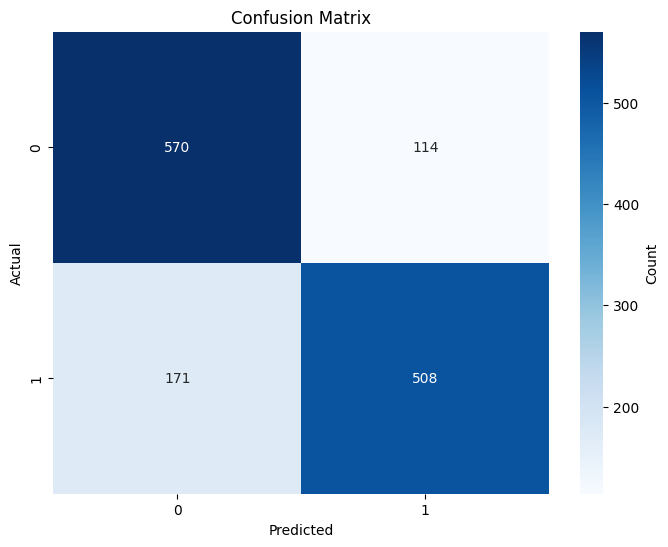

In [ ]:
model_result(Model1)


              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       684
         1.0       0.95      0.99      0.97       679

    accuracy                           0.97      1363
   macro avg       0.97      0.97      0.97      1363
weighted avg       0.97      0.97      0.97      1363



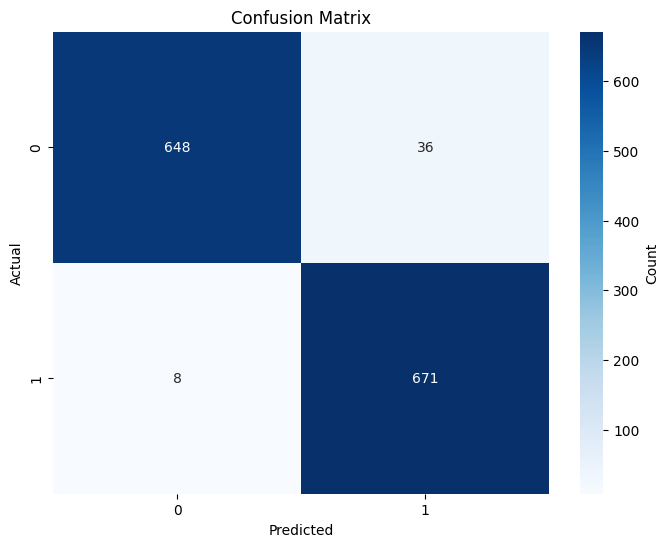

In [ ]:
model_result(Model2)


              precision    recall  f1-score   support

         0.0       0.78      0.90      0.84       684
         1.0       0.88      0.75      0.81       679

    accuracy                           0.82      1363
   macro avg       0.83      0.82      0.82      1363
weighted avg       0.83      0.82      0.82      1363



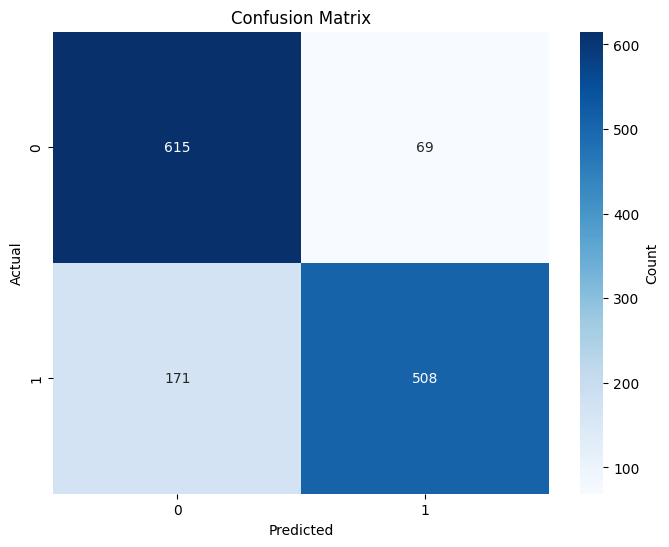

In [ ]:
model_result(Model3)


              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       684
         1.0       0.85      0.74      0.79       679

    accuracy                           0.80      1363
   macro avg       0.81      0.80      0.80      1363
weighted avg       0.81      0.80      0.80      1363



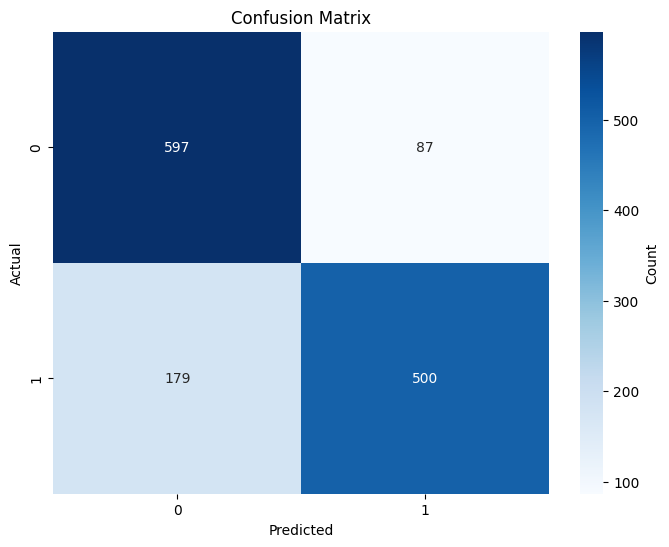

In [ ]:
model_result(Model4)


              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       684
         1.0       0.94      0.98      0.96       679

    accuracy                           0.96      1363
   macro avg       0.96      0.96      0.96      1363
weighted avg       0.96      0.96      0.96      1363



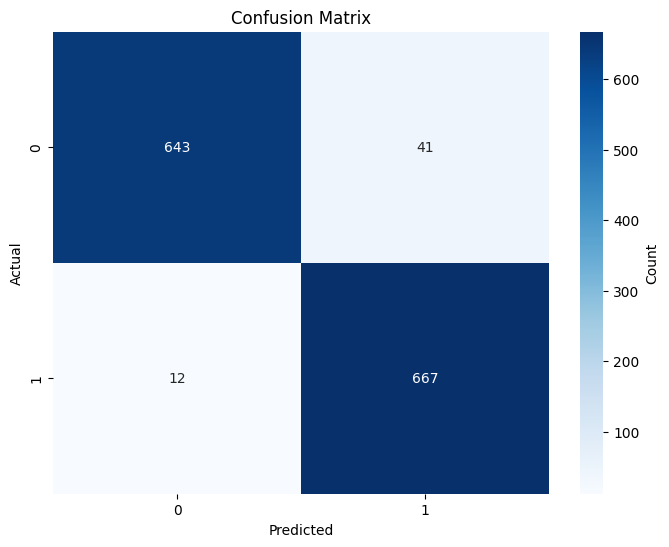

In [ ]:
model_result(Model5)


              precision    recall  f1-score   support

         0.0       0.92      0.73      0.82       684
         1.0       0.78      0.94      0.85       679

    accuracy                           0.83      1363
   macro avg       0.85      0.83      0.83      1363
weighted avg       0.85      0.83      0.83      1363



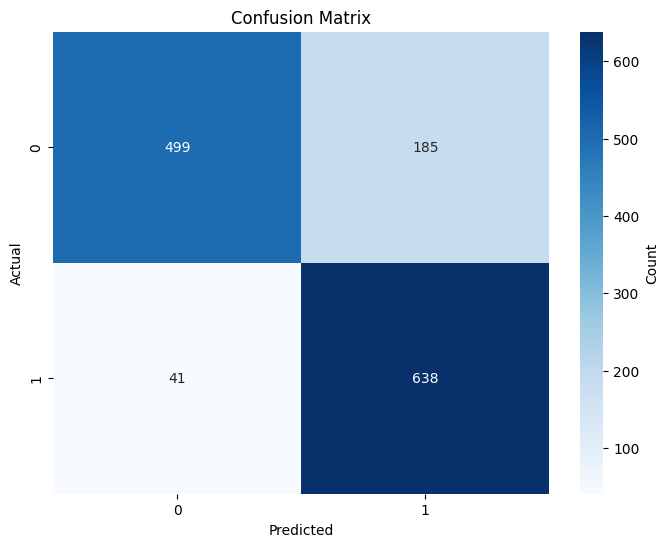

In [ ]:
model_result(Model6)


              precision    recall  f1-score   support

         0.0       0.66      0.85      0.74       684
         1.0       0.78      0.55      0.65       679

    accuracy                           0.70      1363
   macro avg       0.72      0.70      0.69      1363
weighted avg       0.72      0.70      0.69      1363



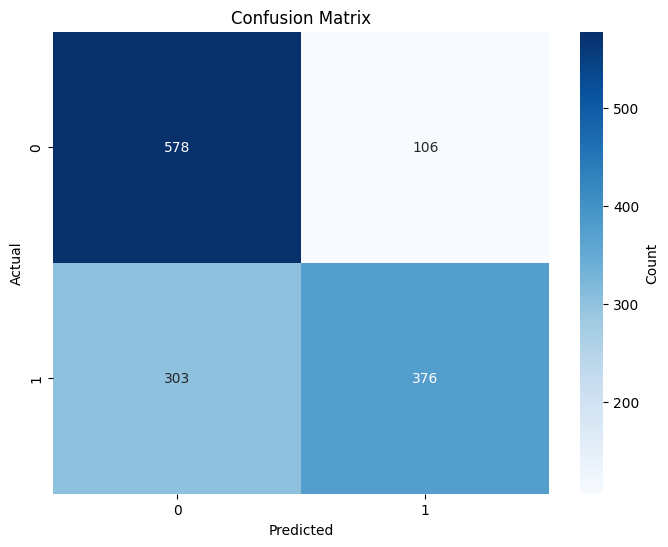

In [ ]:
model_result(Model7)


              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95       684
         1.0       0.92      0.99      0.95       679

    accuracy                           0.95      1363
   macro avg       0.95      0.95      0.95      1363
weighted avg       0.95      0.95      0.95      1363



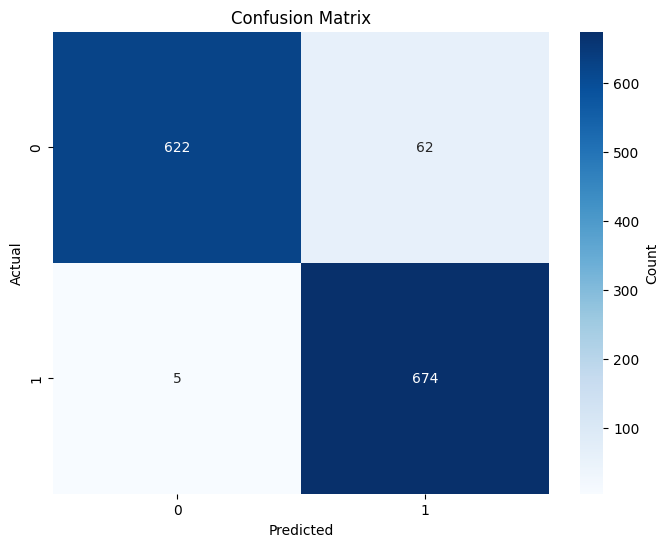

In [ ]:
model_result(Model8)


              precision    recall  f1-score   support

         0.0       0.77      0.85      0.80       684
         1.0       0.83      0.74      0.78       679

    accuracy                           0.79      1363
   macro avg       0.80      0.79      0.79      1363
weighted avg       0.80      0.79      0.79      1363



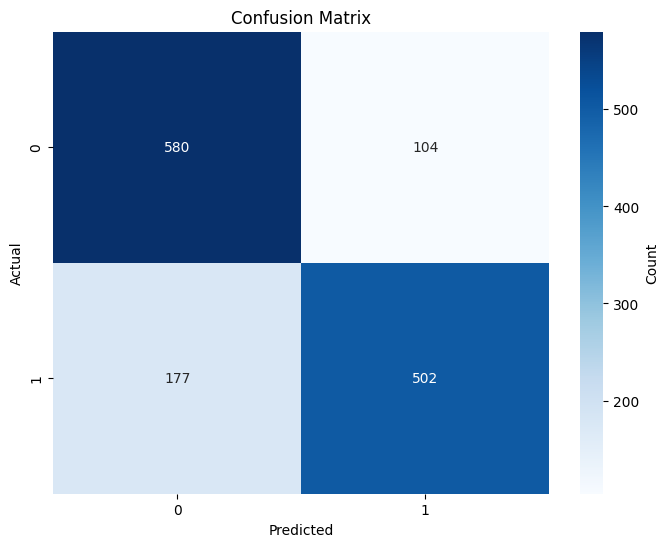

In [ ]:
model_result(Model9)


In [ ]:
Accuracy =acc_list
print(Accuracy)

[0.7909024211298606, 0.9677182685253118, 0.8239178283198826, 0.8048422597212033, 0.9611151870873074, 0.8341892883345561, 0.6999266324284666, 0.9508437270726339, 0.7938371239911959]


In [ ]:
# List of model names (ensure it is a list, not a tuple)
Algorithm = [
    "Logistic Regression",
    "Random Forest Classifier",
    "Gradient Boosting Classifier",
    "Support Vector Classifier (SVC)",
    "XGBoost Classifier",
    "K-Neighbors Classifier",
    "GaussianNB",
    "Decision Tree Classifier"
    "Ada Boost Classifier"
]




In [ ]:
# Ensure that the length of Algorithm and Accuracy are the same
if len(Algorithm) == len(Accuracy):
    # Create the DataFrame with the correct column names
    result = pd.DataFrame({"Algorithm": Algorithm, "Accuracy": Accuracy})

    # Display the result
    print(result)
else:
    print("Error: The length of Algorithm and Accuracy lists do not match.")

Error: The length of Algorithm and Accuracy lists do not match.
